In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_columns', None) # code to display all columns

In [2]:
os.getcwd()

'c:\\Users\\kambl\\Dropbox\\PC\\Desktop\\Hrishikesh\\Job\\Python\\Data Cleaning\\Hotel Booking'

In [3]:
df_init = pd.read_csv('hotel_bookings.csv')    # Will not edit this - May need for comparison
df = pd.read_csv('hotel_bookings.csv')

In [4]:
#Checking sample of data
print(df.shape)
df.head()

(119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Cleaning

#### Duplicate Rows

In [6]:
# Calculate duplicate rows
df.duplicated().sum()

31994

In [7]:
# Drop Duplicate Rows
df.drop_duplicates(keep='first', inplace=True)

In [8]:
# Recheck duplicate rows
df.duplicated().sum()
print(df.shape)
print(df_init.shape)

(87396, 32)
(119390, 32)


#### Missing Values

In [9]:
a = (df.isnull().sum()).sort_values(ascending = False)
a

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [10]:
# Columnw with missing values
b = a[a!=0]
b

company     82137
agent       12193
country       452
children        4
dtype: int64

In [11]:
cols = ['company','agent','country','children']
for i in range(len(cols)):
    print( cols[i] + " = " + str(round(100*df[cols[i]].isnull().sum()/df.shape[0],2)) + " %" )

company = 93.98 %
agent = 13.95 %
country = 0.52 %
children = 0.0 %


Comapany - ID of the company/entity that made the booking or responsible for paying the booking.

Company has 93.98% missing values. So dropping company column

In [12]:
df['agent'].describe()

count    75203.000000
mean        94.138306
std        113.188172
min          1.000000
25%          9.000000
50%         14.000000
75%        240.000000
max        535.000000
Name: agent, dtype: float64

In [13]:
df['agent'].nunique()

333

Agent - ID of the travel agency that made the booking
Agent has 13.95% missing values. Could delete rows, but there are hundreds of unique agent codes, that may not contribute much. So dropping agent.

In [14]:
df.drop(["company", "agent"], axis=1, inplace=True)
df.shape

(87396, 30)

Columns country and children have very small % of missing values, can delete just the rows with missing value.

In [15]:
# Shape of data after handling missing values
df = df.dropna()
print(df.shape)


(86940, 30)


In [16]:
#Recheck missing value
a = (df.isnull().sum()).sort_values(ascending = False)
max(a)

0

In [17]:
cols = ['arrival_date_day_of_month', 'arrival_date_month', 'arrival_date_year']
df['arrival_date'] = df[cols].apply(lambda row: '/'.join(row.values.astype(str)), axis=1)
df['arrival_date'] = pd.to_datetime(df['arrival_date'],errors = 'coerce')
df['arrival_date']




0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date, Length: 86940, dtype: datetime64[ns]

#### Check Data types

In [18]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015,2015-07-01


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86940 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86940 non-null  object        
 1   is_canceled                     86940 non-null  int64         
 2   lead_time                       86940 non-null  int64         
 3   arrival_date_year               86940 non-null  int64         
 4   arrival_date_month              86940 non-null  object        
 5   arrival_date_week_number        86940 non-null  int64         
 6   arrival_date_day_of_month       86940 non-null  int64         
 7   stays_in_weekend_nights         86940 non-null  int64         
 8   stays_in_week_nights            86940 non-null  int64         
 9   adults                          86940 non-null  int64         
 10  children                        86940 non-null  float64       
 11  b

In [20]:
#Changiing data type of resereservation_status_date
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'], format='%m/%d/%Y')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86940 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86940 non-null  object        
 1   is_canceled                     86940 non-null  int64         
 2   lead_time                       86940 non-null  int64         
 3   arrival_date_year               86940 non-null  int64         
 4   arrival_date_month              86940 non-null  object        
 5   arrival_date_week_number        86940 non-null  int64         
 6   arrival_date_day_of_month       86940 non-null  int64         
 7   stays_in_weekend_nights         86940 non-null  int64         
 8   stays_in_week_nights            86940 non-null  int64         
 9   adults                          86940 non-null  int64         
 10  children                        86940 non-null  float64       
 11  b

#### Check Individual Columns

In [22]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             15
stays_in_week_nights                33
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       7
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
days_in_waiting_list               128
customer_type                        4
adr                      

In [23]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date'],
      dtype='object')

In [24]:
# Hotel (H1 = Resort Hotel or H2 = City Hotel) 
df['hotel'].describe()
print(df.hotel.value_counts())

City Hotel      53418
Resort Hotel    33522
Name: hotel, dtype: int64


In [25]:
df['hotel'] = df['hotel'].str.strip().str.replace(' ', '_')
df.hotel.value_counts()

City_Hotel      53418
Resort_Hotel    33522
Name: hotel, dtype: int64

In [26]:

#is_canceled - Value indicating if the booking was canceled (1) or not (0)
df['is_canceled'].describe()
print(df.is_canceled.value_counts())

0    62953
1    23987
Name: is_canceled, dtype: int64


Just 2 categories, no outliers.

##### lead_time

In [27]:
#lead_time - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.
df['lead_time'].describe()

count    86940.000000
mean        80.193375
std         86.100147
min          0.000000
25%         12.000000
50%         50.000000
75%        125.000000
max        737.000000
Name: lead_time, dtype: float64

Booking 737 days i.e more than 2 years before actual visitng the hotel seems weird.

In [28]:
#Checking percentiles w.r.t lead_time
Q9 = np.percentile(df['lead_time'] , [90,92,94,96,98,99,99.5,99.9])
Q9

array([204., 220., 242., 272., 316., 347., 386., 479.])

Even though the maximum lead_time is more than 2 years, more than 99% of the data is within the 1 year period.


In [29]:
print(df[df['lead_time'] > 365].shape)
df[df['lead_time'] > 365].nunique()

(565, 31)


hotel                               2
is_canceled                         2
lead_time                         113
arrival_date_year                   3
arrival_date_month                 12
arrival_date_week_number           52
arrival_date_day_of_month          31
stays_in_weekend_nights             7
stays_in_week_nights               13
adults                              4
children                            3
babies                              2
meal                                3
country                            19
market_segment                      5
distribution_channel                3
is_repeated_guest                   1
previous_cancellations              2
previous_bookings_not_canceled      4
reserved_room_type                  6
assigned_room_type                  9
booking_changes                     7
deposit_type                        3
days_in_waiting_list                6
customer_type                       4
adr                               124
required_car

For 565 entries having lead_time greater than 365 days, there are only 152 arrival dates. This fact along with a preliminary look at the data suggest that a lot of entries are made on few days meaning that this subset of data consists of a lot of group of families/people as compared to individual families/people.

In [30]:
#df[df['lead_time'] > 365]['is_canceled'].values().count()
df[df['lead_time'] > 365].is_canceled.value_counts()

0    334
1    231
Name: is_canceled, dtype: int64

Also, 231 entries i.e 40% of entries with lead time > 365 days, cancelled the booking. 

In [31]:
#Lead time > 365
df[df['lead_time'] > 365].lead_time.value_counts()

386    45
383    30
468    23
423    18
542    17
       ..
467     1
471     1
493     1
424     1
737     1
Name: lead_time, Length: 113, dtype: int64

In [32]:
# Lead time > 365, is_canceled = 0
df2 = df[(df['lead_time'] > 365) & (df['is_canceled'] == 0)].sort_values(by=['lead_time'], ascending = False)
df2['lead_time'].value_counts()

386    36
383    29
542    17
423    15
468    13
409    11
395    11
396    10
457     9
434     9
465     9
414     9
448     8
377     8
388     8
405     8
462     8
385     7
504     7
451     7
479     7
422     6
397     6
418     6
379     5
394     5
476     5
367     4
406     4
429     3
445     3
464     3
518     3
390     3
389     2
384     2
382     2
381     2
376     2
366     2
368     2
460     2
373     2
408     1
463     1
709     1
478     1
737     1
370     1
454     1
374     1
407     1
375     1
424     1
532     1
400     1
399     1
Name: lead_time, dtype: int64

#### Other columns

In [33]:
df2.market_segment.value_counts()

Groups           178
Offline TA/TO    151
Online TA          2
Direct             2
Complementary      1
Name: market_segment, dtype: int64

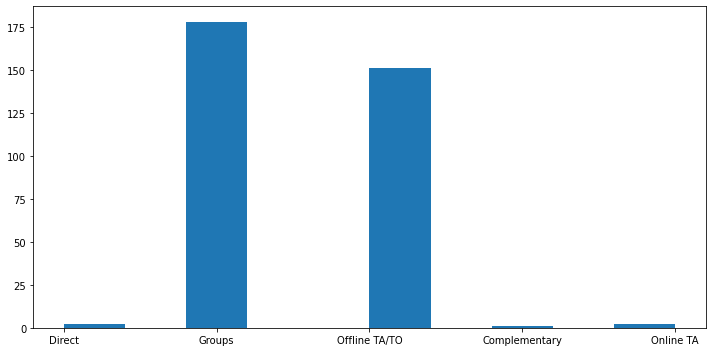

In [34]:
plt.figure(figsize = (10, 5))

df1 = df[df['lead_time'] > 365]

plt.hist(df2['market_segment'])

plt.tight_layout()

By analysis of the lead_time and the market_segment columns, it is verifed that most of the entries with lead_time > 365 are groups.

In [35]:
df['arrival_date_year'].value_counts()

2016    42124
2017    31616
2015    13200
Name: arrival_date_year, dtype: int64

In [36]:
df['arrival_date_month'].value_counts()

August       11232
July         10024
May           8343
April         7871
June          7753
March         7459
October       6883
September     6659
February      6043
December      5082
November      4953
January       4638
Name: arrival_date_month, dtype: int64

In [37]:
for a in df['arrival_date_week_number']:
    if(a%1!=0):
        print("not integer")
df['arrival_date_week_number'].value_counts()

33    2784
34    2489
32    2443
28    2336
30    2328
31    2278
29    2191
27    2159
35    2102
18    2076
21    2039
15    1976
17    1877
23    1868
20    1841
13    1810
19    1810
25    1782
22    1753
24    1743
26    1738
16    1733
14    1680
41    1656
11    1648
38    1629
10    1623
7     1617
36    1615
43    1592
39    1582
9     1568
12    1556
44    1531
8     1512
37    1469
42    1437
40    1421
53    1415
45    1306
6     1277
47    1275
48    1190
49    1162
46    1131
4     1107
5     1090
52    1054
50    1043
3     1031
2      940
1      859
51     768
Name: arrival_date_week_number, dtype: int64

In [38]:
for a in df['arrival_date_day_of_month']:
    if(a%1!=0):
        print("not integer")
df['arrival_date_day_of_month'].value_counts()

17    3004
2     2998
26    2990
5     2967
16    2939
19    2938
12    2919
28    2910
18    2908
11    2906
20    2903
27    2887
29    2867
9     2864
15    2848
25    2822
3     2812
21    2810
8     2797
13    2791
6     2787
4     2785
23    2768
10    2767
24    2762
30    2756
1     2753
7     2696
14    2673
22    2589
31    1724
Name: arrival_date_day_of_month, dtype: int64

stays_in_weekend_nights - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

In [39]:
#Check for non integer values
for a in df['stays_in_weekend_nights']:
    if(a%1!=0):
        print("not integer")
df['stays_in_weekend_nights'].describe()

count    86940.000000
mean         1.007396
std          1.028763
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: stays_in_weekend_nights, dtype: float64

In [40]:
df['stays_in_weekend_nights'].value_counts()

0     34854
2     26369
1     22558
4      1728
3      1144
6       113
5        69
8        60
7        15
9        10
10        7
12        5
13        3
16        3
14        2
Name: stays_in_weekend_nights, dtype: int64

Though 56.27% people stayed atleast 1 or 2 weekend nights, 34854 entries i.e 40% of total observations did not stay for a single weekend night.

stays_in_week_nights - Number of week nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

In [41]:
#Check for non integer values
for a in df['stays_in_week_nights']:
    if(a%1!=0):
        print("not integer")

df['stays_in_week_nights'].describe()

count    86940.000000
mean         2.628744
std          2.043753
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         41.000000
Name: stays_in_week_nights, dtype: float64

In [42]:
df['stays_in_week_nights'].value_counts()

1     21974
2     20635
3     16221
5      9647
4      7865
0      6129
6      1371
10      966
7       965
8       611
9       219
15       68
11       49
20       41
12       40
13       27
14       25
19       21
21       15
16       13
22        7
18        6
25        6
30        5
17        4
24        2
40        2
26        1
32        1
33        1
34        1
35        1
41        1
Name: stays_in_week_nights, dtype: int64

I am adding the weekend and weekday columns to create a new columns that will have the total_stay. It will help in visualization and models. 

In [43]:
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_stay
0,Resort_Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0
1,Resort_Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0
2,Resort_Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1
3,Resort_Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1
4,Resort_Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2


In [44]:
df['total_stay'].describe()

count    86940.000000
mean         3.636140
std          2.748263
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         57.000000
Name: total_stay, dtype: float64

In [45]:
df['total_stay'].value_counts().head()

3    17801
1    16963
2    15632
4    13555
7     7515
Name: total_stay, dtype: int64

The longest stay is 57 days but more than 75% of the entries had total stay of 5 days or less.

In [46]:
df['adults'].describe()

count    86940.000000
mean         1.878525
std          0.625860
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: adults, dtype: float64

In [47]:
#Check for non integer values
for a in df["adults"]:
    if(a%1!=0):
        print("not integer")
df['adults'].value_counts()

2     64340
1     16214
3      5930
0       380
4        60
26        5
5         2
20        2
27        2
6         1
10        1
40        1
50        1
55        1
Name: adults, dtype: int64

55 adults in a single booking seems weird. Let's check the outliers.

In [48]:
df[df['adults'] > 10]


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_stay
1539,Resort_Hotel,1,304,2015,September,36,3,0,3,40,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Group,0.0,0,0,Canceled,2015-01-02,2015-09-03,3
1587,Resort_Hotel,1,333,2015,September,36,5,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Group,0.0,0,0,Canceled,2015-01-02,2015-09-05,7
1643,Resort_Hotel,1,336,2015,September,37,7,1,2,50,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Group,0.0,0,0,Canceled,2015-01-18,2015-09-07,3
1752,Resort_Hotel,1,340,2015,September,37,12,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Group,0.0,0,0,Canceled,2015-01-02,2015-09-12,7
1884,Resort_Hotel,1,347,2015,September,38,19,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Group,0.0,0,0,Canceled,2015-01-02,2015-09-19,7
1917,Resort_Hotel,1,349,2015,September,39,21,1,3,27,0.0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Group,0.0,0,0,Canceled,2015-01-02,2015-09-21,4
1962,Resort_Hotel,1,352,2015,September,39,24,1,3,27,0.0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Group,0.0,0,0,Canceled,2015-01-02,2015-09-24,4
2003,Resort_Hotel,1,354,2015,September,39,26,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Group,0.0,0,0,Canceled,2015-01-02,2015-09-26,7
2164,Resort_Hotel,1,361,2015,October,40,3,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Group,0.0,0,0,Canceled,2015-01-02,2015-10-03,7
2173,Resort_Hotel,1,338,2015,October,41,4,2,0,55,0.0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Group,0.0,0,0,Canceled,2015-01-02,2015-10-04,2


All the booking for more than 10 hotels have a lot in common: They were for the resort hotel, none of them gave a deposit, all of them were coming in the month of Seprtember/October 2015 from the country PRT(Portugal) and they were all canceled.

I suspected there might be a conference/event attracting such a huge crowd, but the bookings were spread out thhrough September, so this seems unlikely.

children - Number of children

In [49]:
df['children'].describe()
for a in df["children"]:
    if(a%1!=0):
        print("not integer")
df['children'].value_counts()

0.0     78587
1.0      4686
2.0      3591
3.0        75
10.0        1
Name: children, dtype: int64

In [50]:
df['children'] = df['children'].astype('int')

In [51]:
df[df['children'] > 4]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_stay
328,Resort_Hotel,1,55,2015,July,29,12,4,10,2,10,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,2,No Deposit,0,Contract,133.16,0,1,No-Show,2015-07-12,2015-07-12,14


Though 10 children with 2 adults entry seems unlikely, there's just one such entry so I will not remove it.

babies - Number of babies

In [52]:
df['babies'].describe()
for a in df["babies"]:
    if(a%1!=0):
        print("not integer")
df['babies'].value_counts()

0     86029
1       895
2        14
9         1
10        1
Name: babies, dtype: int64

The age group for classifying children and babies is not provided. I believe the term babies is for 0-5 year or shorter range. Let's check the outliers, guests with 9 or 10 babies.

In [53]:
df[df['babies'] > 2]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_stay
46619,City_Hotel,0,37,2016,January,3,12,0,2,2,0,10,BB,PRT,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,0,Transient,84.45,0,1,Check-Out,2016-01-14,2016-01-12,2
78656,City_Hotel,0,11,2015,October,42,11,2,1,1,0,9,BB,GBR,Corporate,Corporate,0,0,0,A,B,1,No Deposit,0,Transient-Party,95.00,0,0,Check-Out,2015-10-14,2015-10-11,3


Observing both cases, 1 adult with 9 babies and 2 adults with 10 babies seem highly unlikely. Since these are the only rows with such distinct data, I will drop these rows.

In [54]:
df.drop(df[df['babies'] > 4].index, inplace = True)

I am adding the adults, children and babies columns to create a new columns that will have the total_members.

In [55]:
df['total_members'] = df['adults'] + df['children'] + df['babies'] 

Type of meal booked. Categories are presented in standard hospitality meal packages:
Undefined/SC – no meal package;
BB – Bed & Breakfast;
HB – Half board (breakfast and one other meal – usually dinner);
FB – Full board (breakfast, lunch and dinner)

In [56]:
df['meal'].value_counts()

BB           67560
SC            9474
HB            9056
Undefined      488
FB             360
Name: meal, dtype: int64

In the dataset information - Undefined and SC are given as the same thing. So need for new category.

In [57]:
df['meal'].replace(to_replace = 'Undefined', value = 'SC', inplace = True)
df['meal'].value_counts()

BB    67560
SC     9962
HB     9056
FB      360
Name: meal, dtype: int64

country - Country of origin. Categories are represented in the ISO 3155–3:2013 format

In [58]:
df['country'].describe()

count     86938
unique      177
top         PRT
freq      27448
Name: country, dtype: object

In [59]:
df['country'].value_counts()

PRT    27448
GBR    10432
FRA     8837
ESP     7252
DEU     5387
       ...  
BWA        1
DJI        1
CYM        1
SDN        1
SMR        1
Name: country, Length: 177, dtype: int64

These hotels receive guests from 177 countries!

market_segment - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

In [60]:
df['market_segment'].value_counts()

Online TA        51542
Offline TA/TO    13857
Direct           11647
Groups            4937
Corporate         4030
Complementary      698
Aviation           227
Name: market_segment, dtype: int64

distribution_channel - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

In [61]:
df['distribution_channel'].value_counts()

TA/TO        69027
Direct       12827
Corporate     4902
GDS            181
Undefined        1
Name: distribution_channel, dtype: int64

In [62]:
df[df['distribution_channel'] == 'Undefined']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_stay,total_members
14594,Resort_Hotel,0,103,2015,July,28,5,2,3,2,1,0,HB,PRT,Direct,Undefined,0,0,0,A,A,0,No Deposit,0,Transient,112.7,1,2,Check-Out,2015-07-10,2015-07-05,5,3


In [63]:
df.drop(df[df['distribution_channel'] == 'Undefined'].index, inplace = True)

is_repeated_guest - Value indicating if the booking name was from a repeated guest (1) or not (0)

In [64]:
df['is_repeated_guest'].value_counts()

0    83526
1     3411
Name: is_repeated_guest, dtype: int64

previous_cancellations - Number of previous bookings that were cancelled by the customer prior to the current booking

In [65]:
df['previous_cancellations'].describe()

count    86937.000000
mean         0.030229
std          0.369580
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.000000
Name: previous_cancellations, dtype: float64

In [66]:
df['previous_cancellations'].value_counts()

0     85279
1      1383
2       109
3        61
4        30
11       27
5        19
6        17
13        4
24        2
25        2
14        1
19        1
21        1
26        1
Name: previous_cancellations, dtype: int64

There are multiple outliers with cancellations > 6. Since most of them 1/2 entries, I am not deleting them.

previous_bookings_not_canceled - Number of previous bookings not cancelled by the customer prior to the current booking

In [67]:
df['previous_bookings_not_canceled'].describe()

count    86937.000000
mean         0.176714
std          1.717914
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         72.000000
Name: previous_bookings_not_canceled, dtype: float64

In [68]:
df['previous_bookings_not_canceled'].value_counts()

0     83615
1      1392
2       536
3       299
4       208
      ...  
38        1
39        1
71        1
41        1
63        1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64

reserved_room_type - Code of room type reserved. Code is presented instead of designation for anonymity reasons

In [69]:
df['reserved_room_type'].value_counts()

A    56187
D    17369
E     6012
F     2816
G     2041
B      995
C      914
H      596
L        6
P        1
Name: reserved_room_type, dtype: int64

assigned_room_type - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons

In [70]:
df['assigned_room_type'].value_counts()

A    46150
D    22277
E     7128
F     3608
G     2484
C     2144
B     1815
H      702
I      351
K      276
P        1
L        1
Name: assigned_room_type, dtype: int64

Creating a new column which tells whether a: 1 = The guest got the same typr of room as they had asked, 0 = The guest did not get the same type of room as they had asked.

In [71]:
df['assigned_same_room'] = (df['reserved_room_type'] == df['assigned_room_type']).astype(int)

In [72]:
df['assigned_same_room'].value_counts()

1    74045
0    12892
Name: assigned_same_room, dtype: int64

Booking_changes - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

In [73]:
a = df['booking_changes'].value_counts()
a

0     71117
1     10838
2      3493
3       873
4       355
5       116
6        59
7        31
8        17
9         8
10        6
13        5
14        5
15        3
11        2
12        2
16        2
17        2
18        1
20        1
21        1
Name: booking_changes, dtype: int64

In [74]:
df[df['booking_changes'] > 4].value_counts().sum()

261

There are 261 where the guests made more than 4 changes to their booking status. Some guests changed their booking status 21 times!!

Also, we only have dates for the last change made to the reservation status, not for each time a change was made. Hence, the knowledge that a guest changed their reservation 10 or 15 times would not have significant insights. So dropping rows where booking status was changed more than 4 times - 261 rows - 0.007% of rows.

In [75]:
df.drop(df[df['booking_changes'] > 4].index, inplace = True)

Deposit Type - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
No Deposit – no deposit was made;
Non Refund – a deposit was made in the value of the total stay cost;
Refundable – a deposit was made with a value under the total cost of stay

In [76]:
df['deposit_type'].value_counts()

No Deposit    85532
Non Refund     1037
Refundable      107
Name: deposit_type, dtype: int64

days_in_waiting_list - Number of days the booking was in the waiting list before it was confirmed to the customer

In [77]:
df['days_in_waiting_list'].describe()

count    86676.000000
mean         0.752227
std         10.041750
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        391.000000
Name: days_in_waiting_list, dtype: float64

Waiting_list statistics when wait is more than 0 i.e there is some waiting time.

In [78]:
df[df['days_in_waiting_list'] >0]['days_in_waiting_list'].describe()

count    854.000000
mean      76.346604
std       66.843691
min        1.000000
25%       33.000000
50%       59.000000
75%       99.000000
max      391.000000
Name: days_in_waiting_list, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x289850494c0>,
 'caps': [<matplotlib.lines.Line2D at 0x289852916a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28984fe66d0>],
 'medians': [<matplotlib.lines.Line2D at 0x289850acd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x28985044d00>],
 'means': []}

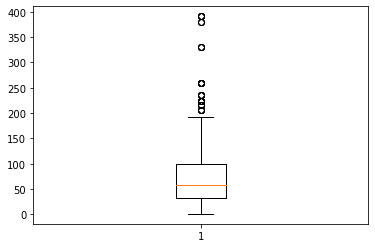

In [79]:
plt.boxplot(df[df['days_in_waiting_list'] >0]['days_in_waiting_list'])

In [80]:
df[df['days_in_waiting_list'] >0]['hotel'].value_counts()

City_Hotel      714
Resort_Hotel    140
Name: hotel, dtype: int64

In [81]:
df[df['days_in_waiting_list'] >185]['hotel'].value_counts()

City_Hotel    63
Name: hotel, dtype: int64

Of the 854 guests who had to wait, 83.65% had reserved rooms in the City Hotel. At the Resort Hotel, no one had to wait for more than 185 days before getting a confirmation.

customer_type - Type of booking, assuming one of four categories:

Contract - when the booking has an allotment or other type of contract associated to it;
Group – when the booking is associated to a group;
Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
Transient-party – when the booking is transient, but is associated to at least other transient booking

In [82]:
df['customer_type'].value_counts()

Transient          71416
Transient-Party    11587
Contract            3137
Group                536
Name: customer_type, dtype: int64

adr - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

In [83]:
df['adr'].describe()

count    86676.000000
mean       106.598973
std         54.915054
min         -6.380000
25%         72.250000
50%         98.500000
75%        134.100000
max       5400.000000
Name: adr, dtype: float64

In [84]:
df[df['adr'] < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_stay,total_members,assigned_same_room
14969,Resort_Hotel,0,195,2017,March,10,5,4,6,2,0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15,2017-03-05,10,2,0


In [85]:
df[df['adr'] >500]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_stay,total_members,assigned_same_room
15083,Resort_Hotel,0,1,2015,July,29,15,0,1,2,0,0,BB,PRT,Corporate,Corporate,1,0,1,A,C,0,No Deposit,0,Transient,508.0,1,0,Check-Out,2015-07-16,2015-07-15,1,2,0
48515,City_Hotel,1,35,2016,March,13,25,0,1,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,0,Transient,5400.0,0,0,Canceled,2016-02-19,2016-03-25,1,2,1
111403,City_Hotel,0,0,2017,May,19,9,0,1,1,0,0,BB,ITA,Offline TA/TO,TA/TO,0,0,0,A,G,0,No Deposit,0,Transient,510.0,0,0,Check-Out,2017-05-10,2017-05-09,1,1,0


Minimum value of adr is -6. Average daily rate cannot be negative, will drop this row. Another entry has adr 5400. This is not in the realistic range.

Text(0, 0.5, 'ADR')

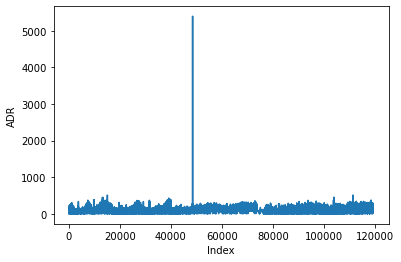

In [86]:
plt.plot(df['adr'])
plt.xlabel('Index')
plt.ylabel('ADR')

Text(0, 0.5, 'ADR')

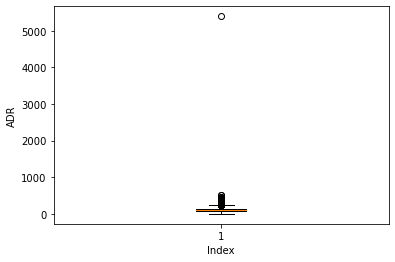

In [87]:
plt.boxplot(df['adr'])
plt.xlabel('Index')
plt.ylabel('ADR')

In [88]:
df.drop(df[df['adr'] == 5400].index, inplace = True)
df.drop(df[df['adr'] < 0].index, inplace = True)

required_car_parking_spaces - Number of car parking spaces required by the customer

In [89]:
df['required_car_parking_spaces'].describe()

count    86674.000000
mean         0.083324
std          0.280228
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: required_car_parking_spaces, dtype: float64

In [90]:
df['required_car_parking_spaces'].value_counts()

0    79500
1     7141
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

Requiring 8 parking seems a lot. Let's check

In [91]:
df[df['required_car_parking_spaces'] > 3]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_stay,total_members,assigned_same_room
29045,Resort_Hotel,0,26,2017,March,11,14,0,5,2,0,0,HB,AUT,Direct,Corporate,1,0,2,E,I,1,No Deposit,0,Transient-Party,40.0,8,1,Check-Out,2017-03-19,2017-03-14,5,2,0
29046,Resort_Hotel,0,138,2017,March,12,19,2,2,2,0,0,HB,AUT,Direct,Corporate,1,0,2,E,F,1,No Deposit,122,Transient-Party,80.0,8,0,Check-Out,2017-03-23,2017-03-19,4,2,0


Both these entries are for just 2 adults. It seems unlikely that 2 people reserved 8 car parking spaces. The fact that even larger groups at these hotels did not require more than 3 parking spaces is enough to say this entry was an error.

In [92]:
df.drop(df[df['required_car_parking_spaces'] > 3].index, inplace = True)

total_of_special_requests - Number of special requests made by the customer (e.g. twin bed or high floor)

In [93]:
df['total_of_special_requests'].describe()

count    86672.000000
mean         0.699084
std          0.831452
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: total_of_special_requests, dtype: float64

In [94]:
df['total_of_special_requests'].value_counts()

0    43475
1    28832
2    11721
3     2293
4      317
5       34
Name: total_of_special_requests, dtype: int64

reservation_status - Reservation last status, assuming one of three categories:
Canceled – booking was canceled by the customer;
Check-Out – customer has checked in but already departed;
No-Show – customer did not check-in and did inform the hotel of the reason why

In [95]:
df['reservation_status'].value_counts()

Check-Out    62734
Canceled     22931
No-Show       1007
Name: reservation_status, dtype: int64

reservation_status_date - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86672 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86672 non-null  object        
 1   is_canceled                     86672 non-null  int64         
 2   lead_time                       86672 non-null  int64         
 3   arrival_date_year               86672 non-null  int64         
 4   arrival_date_month              86672 non-null  object        
 5   arrival_date_week_number        86672 non-null  int64         
 6   arrival_date_day_of_month       86672 non-null  int64         
 7   stays_in_weekend_nights         86672 non-null  int64         
 8   stays_in_week_nights            86672 non-null  int64         
 9   adults                          86672 non-null  int64         
 10  children                        86672 non-null  int32         
 11  b

In [97]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'total_stay', 'total_members', 'assigned_same_room'],
      dtype='object')

In [98]:
# Rearranging Columns
df=df[['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'arrival_date', 'total_stay','stays_in_weekend_nights',
       'stays_in_week_nights', 'total_members', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type','assigned_same_room', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']]
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'arrival_date', 'total_stay',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'total_members',
       'adults', 'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'assigned_same_room', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [99]:
#df.to_csv("Cleaned_Hotel_Bookings.csv")